#  RNNs

#### GRU , LSTM , SIMPLE_RNN FOR CHARACTER LEVEL PREDICTION
#### BI-DIRECTIONAL LSTM FOR WORD LEVEL PREDICTION

## 1. IMPORTING LIBRARIES

#### my_rnns has implementations of custom classes

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import time
import numpy as np
from my_rnns import process_data,data_set,initializers,GRU_Model,LSTM_Model,RNN_Model,OneStep

## 2. FUNCTION TO RETRIEVE TEXT FILE

In [ ]:
def get_txt_file(name,url):
        path_to_file = tf.keras.utils.get_file(name , url)
        text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
        print(f'Length of text: {len(text)} characters')
        return text

text = get_txt_file('shakespeare.txt','https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt')

Length of text: 4573338 characters


## 3. FUNCTION TO PLOT GRAPHS FOR CHAR LEVEL PREDICTION

In [ ]:
def plot(model_name):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title('Accuracy vs Epochs')
    plt.plot(model_name.history['accuracy'], label='accuracy')
    plt.plot(model_name.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.title('Loss vs Epochs')
    plt.plot(model_name.history['loss'], label='loss')
    plt.plot(model_name.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')

    plt.show()

## 4. TOKENIZATION OF CHARACTERS

In [ ]:
process_data_obj = process_data(text)
uniq_char = process_data_obj.get_uniq_char()
tokenizer = process_data_obj.tokenize()
chars_from_id = process_data_obj.char_from_ids()
text_from_ids = process_data_obj.text_from_ids(tokenizer(list(text[6000:6200])))
print(f'{len(uniq_char)} unique characters')
print('\n Tokenized data............\n')
print(tokenizer(list(text[6000:6200])))
print('\n Text data............\n')
print(text_from_ids)
my_string = text_from_ids.numpy().decode("utf-8")
print('\n',my_string,'\n')

67 unique characters

 Tokenized data............

tf.Tensor(
[46 42 59 61  7  2 61 56  2 61 49 46  2 60 46 42 61  2 56  6  2 61 49 46
  2 43 59 42 50 55 12  1 14 55 45  7  2 61 49 59 56 62 48 49  2 61 49 46
  2 44 59 42 55 52 60  2 42 55 45  2 56 47 47 50 44 46 60  2 56 47  2 54
 42 55  7  1 33 49 46  2 60 61 59 56 55 48 46 60 61  2 55 46 59 63 46 60
  2 42 55 45  2 60 54 42 53 53  2 50 55 47 46 59 50 56 59  2 63 46 50 55
 60  1 19 59 56 54  2 54 46  2 59 46 44 46 50 63 46  2 61 49 42 61  2 55
 42 61 62 59 42 53  2 44 56 54 57 46 61 46 55 44 66  1 36 49 46 59 46 43
 66  2 61 49 46 66  2 53 50 63 46 11  2 42 55 45  2 61 49 56 62 48 49  2
 61 49 42 61  2 42 53 53], shape=(200,), dtype=int64)

 Text data............

tf.Tensor(b"eart, to the seat o' the brain;\nAnd, through the cranks and offices of man,\nThe strongest nerves and small inferior veins\nFrom me receive that natural competency\nWhereby they live: and though that all", shape=(), dtype=string)

 eart, to the seat o' the brain

## 5. DATASET PREPARATION

In [ ]:
my_data=data_set(text,100,64,0.8)
train_dataset,val_dataset = my_data.prepare(tokenizer)

## 6. GRU , LSTM , SIMPLE-RNN FOR CHAR LEVEL PREDICTION

In [ ]:
gru_model = GRU_Model(len(tokenizer.get_vocabulary()))
lstm_model = LSTM_Model(len(tokenizer.get_vocabulary()))
rnn_model = RNN_Model(len(tokenizer.get_vocabulary()))

Epoch 1/30
565/565 [==============================] - 25s 36ms/step - loss: 2.1449 - accuracy: 0.3938 - val_loss: 1.6516 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 2/30
565/565 [==============================] - 21s 36ms/step - loss: 1.5168 - accuracy: 0.5424 - val_loss: 1.4187 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 3/30
565/565 [==============================] - 21s 36ms/step - loss: 1.3760 - accuracy: 0.5779 - val_loss: 1.3405 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 4/30
565/565 [==============================] - 21s 36ms/step - loss: 1.3134 - accuracy: 0.5931 - val_loss: 1.2903 - val_accuracy: 0.6008 - lr: 0.0010
Epoch 5/30
565/565 [==============================] - 21s 36ms/step - loss: 1.2738 - accuracy: 0.6031 - val_loss: 1.2549 - val_accuracy: 0.6094 - lr: 0.0010
Epoch 6/30
565/565 [==============================] - 21s 36ms/step - loss: 1.2423 - accuracy: 0.6113 - val_loss: 1.2283 - val_accuracy: 0.6163 - lr: 0.0010
Epoch 7/30
565/565 [==============================] - 21s 

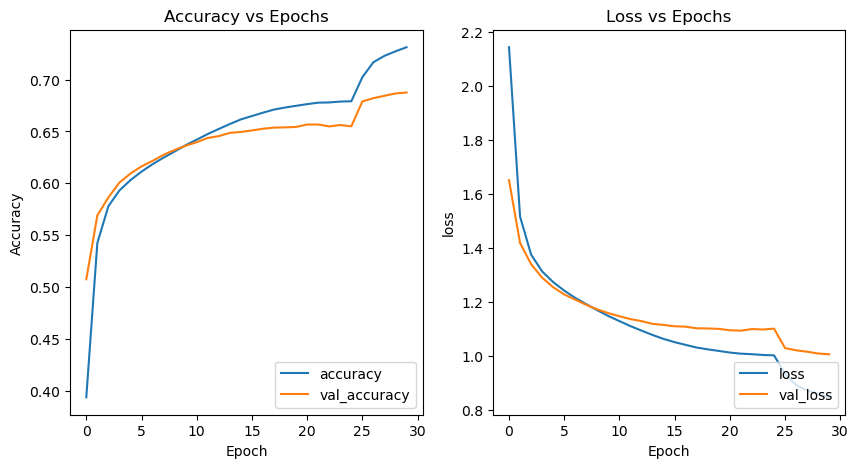

In [ ]:
gru_model.compile(optimizer=gru_model.optimizer, loss=gru_model.loss,metrics=gru_model.metric)
gru_model.fit(train_dataset, epochs=gru_model.epochs, validation_data=val_dataset, callbacks=gru_model.callbacks)
gru_history = gru_model.history
plot(gru_history)

Epoch 1/50
565/565 [==============================] - 27s 44ms/step - loss: 2.2708 - accuracy: 0.3604 - val_loss: 1.7903 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 2/50
565/565 [==============================] - 26s 44ms/step - loss: 1.6250 - accuracy: 0.5136 - val_loss: 1.5050 - val_accuracy: 0.5468 - lr: 0.0010
Epoch 3/50
565/565 [==============================] - 26s 44ms/step - loss: 1.4416 - accuracy: 0.5614 - val_loss: 1.3987 - val_accuracy: 0.5731 - lr: 0.0010
Epoch 4/50
565/565 [==============================] - 26s 45ms/step - loss: 1.3619 - accuracy: 0.5810 - val_loss: 1.3389 - val_accuracy: 0.5876 - lr: 0.0010
Epoch 5/50
565/565 [==============================] - 26s 45ms/step - loss: 1.3145 - accuracy: 0.5927 - val_loss: 1.3058 - val_accuracy: 0.5960 - lr: 0.0010
Epoch 6/50
565/565 [==============================] - 26s 45ms/step - loss: 1.2818 - accuracy: 0.6007 - val_loss: 1.2705 - val_accuracy: 0.6055 - lr: 0.0010
Epoch 7/50
565/565 [==============================] - 26s 

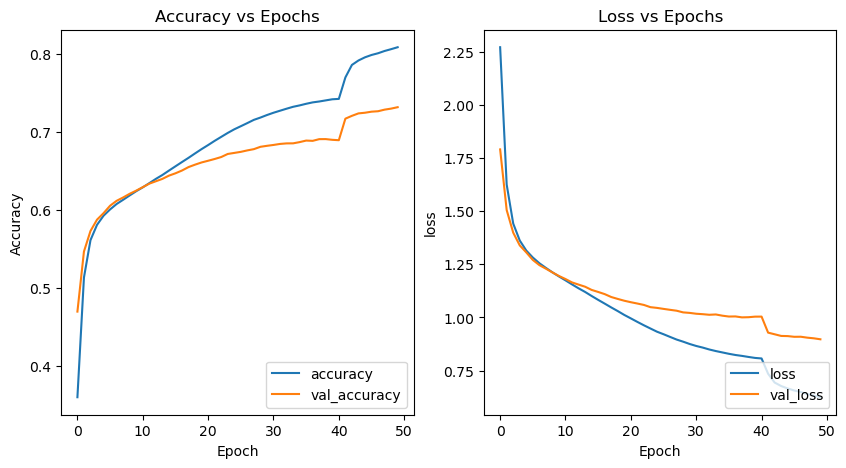

In [ ]:
# Default value of epochs wasn't used here
lstm_model.compile(optimizer=lstm_model.optimizer, loss=lstm_model.loss,metrics=lstm_model.metric)
lstm_model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=lstm_model.callbacks)
lstm_history = lstm_model.history
plot(lstm_history)

Epoch 1/30
565/565 [==============================] - 40s 66ms/step - loss: 2.2540 - accuracy: 0.3660 - val_loss: 1.8401 - val_accuracy: 0.4608 - lr: 0.0010
Epoch 2/30
565/565 [==============================] - 38s 66ms/step - loss: 1.7004 - accuracy: 0.4954 - val_loss: 1.5944 - val_accuracy: 0.5240 - lr: 0.0010
Epoch 3/30
565/565 [==============================] - 39s 68ms/step - loss: 1.5405 - accuracy: 0.5365 - val_loss: 1.4969 - val_accuracy: 0.5482 - lr: 0.0010
Epoch 4/30
565/565 [==============================] - 38s 66ms/step - loss: 1.4653 - accuracy: 0.5546 - val_loss: 1.4468 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 5/30
565/565 [==============================] - 38s 66ms/step - loss: 1.4231 - accuracy: 0.5646 - val_loss: 1.4150 - val_accuracy: 0.5678 - lr: 0.0010
Epoch 6/30
565/565 [==============================] - 39s 67ms/step - loss: 1.3950 - accuracy: 0.5715 - val_loss: 1.3908 - val_accuracy: 0.5721 - lr: 0.0010
Epoch 7/30
565/565 [==============================] - 39s 

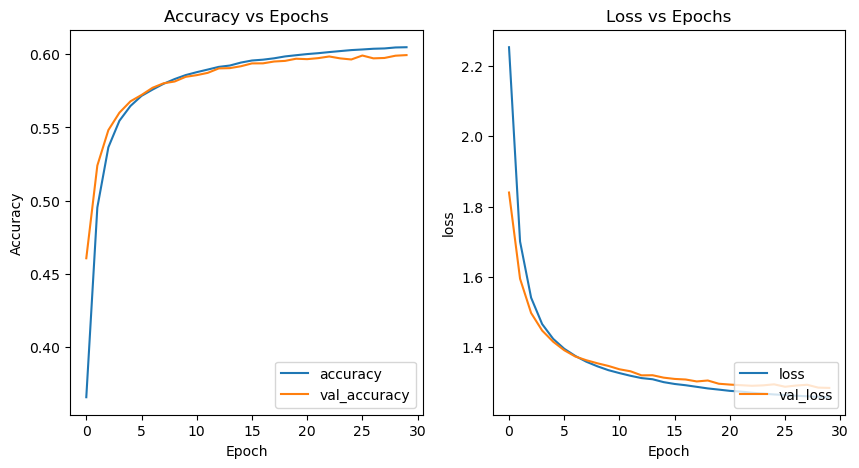

In [ ]:
rnn_model.compile(optimizer=rnn_model.optimizer, loss=rnn_model.loss,metrics=rnn_model.metric)
rnn_model.fit(train_dataset, epochs=rnn_model.epochs, validation_data=val_dataset, callbacks=rnn_model.callbacks)
rnn_history = rnn_model.history
plot(rnn_history)

In [ ]:
gru_model.save_weights('gru_weights.h5')
lstm_model.save_weights('lstm_weights.h5')
rnn_model.save_weights('rnn_weights.h5')

In [ ]:
gru_model.load_weights('gru_weights.h5')
lstm_model.load_weights('lstm_weights.h5')
rnn_model.load_weights('rnn_weights.h5')

## 7. TESTING THE TRAINED MODEL

In [ ]:
gru_out = OneStep(gru_model, chars_from_id, tokenizer)
lstm_out = OneStep(lstm_model, chars_from_id, tokenizer)
rnn_out = OneStep(rnn_model, chars_from_id, tokenizer)

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['All: \n thou heart stinks thee'])
result = [next_char]

for n in range(1000):
    next_char, states = gru_out.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

All: 
 thou heart stinks thee he hath much poor labour of
the difference. Then this is not yet wherein negligence,
I would appear against ambassador than I,
And when I am afeard
I did home sack: Say the untertaken's
remains without me: she never came full of heart:
Joinn is all wither'd in these faults that does not die:
Laid Thisby shall do wear his daughter.

LYSANDER:
'Tis a shadow of his dog, adieu:'--

RUGLEO:
For me, take down me.

MENAS:
We'll plead you so, and let me find Master Plagus; let us he
There stay your blinds that I can of the new.
Good as there is my present bed and place
With cheer. Now, Bratsmell, that contains
Comes not the Daneagent frost-spring to the shift?
Then let thy brother Titus Lary Peter,
And little have chrosp'd up with Halfurious neck,
Than in these dangerous eyes to their enemies.
Adoin!
O Montry, from cymech and weeds now
made me an ass! How might when such master's beauty would
desight to see?

CADE:
O, a most pin he took a strange redemption modera

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['All: \n thou heart stinks thee'])
result = [next_char]

for n in range(1000):
    next_char, states = lstm_out.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

All: 
 thou heart stinks thee from thy state in thy name
well: that same lion is oped made of, so they
such a murderous vowering nor why, they shall not be made
me at my death to the desire. And she is allowed but by
the face of my that wants utmers, after them i'
the two king.

Poet:
Then thou hadst little from me threach so many
a mass, as any matter, happily entreats them.
His Desdemona should be most understanding
by the princely grandsire? I have sing in thy knife,
with such-like you are to you and other exhaletes
than a motley throat. I lead this place with a word.

AUDREY:
It is a happiness, O noble blost, in fine
A royal officer court: choich and drink, shotter,--
I was too near my people.

CORIOLANUS:
Truly, sister, when our Cymberk shall underveatle.

SUFFOLK:
I'll talk them forth: since thou hast need, thou shalt
ne'er pass on thy breast in secret,--at and by:
I know 'tis boots thee for thy father's hat.
Come buy! why, both a parle excuse of me,
Though well becomes thee bett

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['All: \n thou heart stinks thee'])
result = [next_char]

for n in range(1000):
    next_char, states = rnn_out.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

All: 
 thou heart stinks thee to point.

OPHELIA:
What token:
Mine tapor shall obey well.

GLOUCESTER:
Was a dog?

HUBENT:
Worked I will give thee short,
And I must to the march,
Whose spirits from her pass,
Waking, as fall'n body?
'Tis he i' the noble brave thing
These that to-day, as much
past, the mighty host,
Contemplance action of an
ass of heaven, the stamp of our extremes, till let Of wit to service to captain, makes me straited and true return'd,
As he is mock
Troe no goes
Shall wear it.

FLAMEOT:
Were his life, or else you made well
To thyself and good Harry; oaths of the world;
The prince upon my
faith,
to the babilings: there's a pretty: I see no law and Caesar,
As unknown thus,
He both shine.

HOLETH:
So, sir, get you gone!
Jool, let our friendshipes,
I'll sound at weary.

Sexton:
Sweet, watch'd to be here and
chaste yield again;
How hear'st since you know thy life, who would not be unkind-merchant,
But up and hazard our bends with caitiff: and that he will do contend.

KIN

## 8. WORD LEVEL SCRIPT

In [ ]:
from my_rnns import word_level_process_data,data_set_word_level

## Considering a small part of the text 

In [ ]:
word_level_text = text[:50000]
word_level_text = word_level_text.lower().split("\n")

## 8.1 TOKENIZING

In [ ]:
word_lvl_obj = word_level_process_data(word_level_text)
tokenizer = word_lvl_obj.word_level_process()


 The total words are :2081 


Do u want to print the word dictionary? (y/n)

y


The word index dictionary is :

 {'the': 1, 'and': 2, 'to': 3, 'you': 4, 'i': 5, 'of': 6, 'a': 7, 'in': 8, 'that': 9, 'he': 10, 'marcius': 11, 'not': 12, 'for': 13, 'your': 14, 'him': 15, 'it': 16, 'with': 17, 'my': 18, 'is': 19, 'have': 20, 'as': 21, 'be': 22, 'they': 23, 'we': 24, 'his': 25, 'are': 26, 'their': 27, 'first': 28, 'our': 29, 'but': 30, 'menenius': 31, 'me': 32, 'all': 33, 'what': 34, 'good': 35, 'shall': 36, 'this': 37, 'will': 38, 'than': 39, 'if': 40, 'no': 41, 'at': 42, 'us': 43, 'cominius': 44, 'them': 45, 'well': 46, 'so': 47, 'do': 48, 'citizen': 49, 'more': 50, 'would': 51, 'which': 52, 'make': 53, 'aufidius': 54, 'on': 55, 'or': 56, 'brutus': 57, 'volumnia': 58, 'were': 59, 'come': 60, 'by': 61, 'know': 62, 'where': 63, 'upon': 64, 'lartius': 65, 'one': 66, 'like': 67, 'from': 68, 'then': 69, 'rome': 70, "'tis": 71, 'was': 72, 'when': 73, 'how': 74, 'o': 75, 'must': 76, 'sicinius':

## 8.2 DATASET PREPARATION

In [ ]:
data_word_level_obj = data_set_word_level(word_level_text,tokenizer)
X , Y , max_seq_length = data_word_level_obj.gen_data()

## 8.3 BI-DIRECTIONAL LSTM FOR WORD PREDICTION

### MODEL UTILIZES ALL 3 CALLBACKS

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 256)           532736    
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              488400    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 2081)              626381    
                                                                 
Total params: 1,647,517
Trainable params: 1,647,517
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
234/235 [============================>.] - ETA: 0s - loss: 6.6643 - accuracy: 0.0433
Epoch 1: accuracy improved from -inf to 0.04326, saving model to bi_direc_lstm.h5
235/235 [==============================] - 12s 27ms/step - loss:

Text(0, 0.5, 'loss')

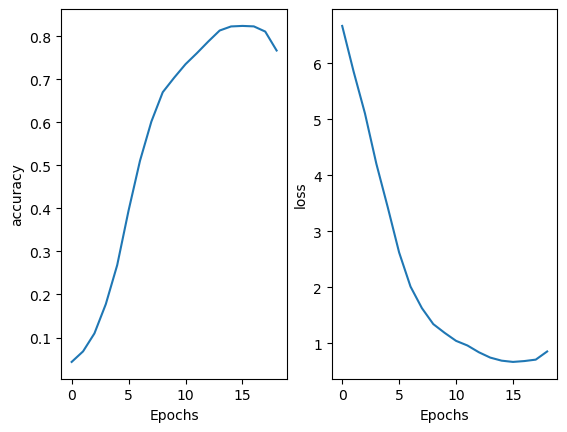

In [ ]:
callbacks=[
            tf.keras.callbacks.ModelCheckpoint(filepath='bi_direc_lstm.h5',
                                                monitor='accuracy', 
                                                save_best_only=True, 
                                                mode='max', 
                                                verbose=1),
            tf.keras.callbacks.EarlyStopping(monitor='loss',
                                             mode='auto',
                                             verbose=1,
                                             patience=3),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                patience=3,
                                                verbose=1,
                                                factor=.5, 
                                                min_lr=0.0000001)
        ]

embedding_dim = 256
lstm_units = 150
learning_rate = 0.01
epochs = 50


model = tf.keras.models.Sequential([
          tf.keras.layers.Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_seq_length-1),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
          tf.keras.layers.Dense(len(tokenizer.word_index)+1, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )


model.summary()


history = model.fit(X, Y, epochs=epochs , callbacks=callbacks)

plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')

## 8.4 PREDICTION USING THE TRAINED MODEL

In [ ]:
model = tf.keras.models.load_model('bi_direc_lstm.h5')

# Define seed text
seed_text = 'So, sir, get you gone!'

# Define total words to predict
next_words = 200

# Loop until desired length is reached
for _ in range(next_words):

        # Convert the seed text to a token sequence
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad the sequence
        token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')

        # Feed to the model and get the probabilities for each index
        probabilities = model.predict(token_list, verbose=0)

        # Get the index with the highest probability
        predicted = np.argmax(probabilities, axis=-1)[0]

        # Ignore if index is 0 because that is just the padding.
        if predicted != 0:

            # Look up the word associated with the index. 
            output_word = tokenizer.index_word[predicted]

            # Combine with the seed text
            seed_text += " " + output_word

# Print the result
print(seed_text)

So, sir, get you gone! with one part of your syllables and all but what i think they say there's all resolved rather to die than to do no more their mother and they are price they will they will and they will they think well enough too what barm can your bisson to me and it with me will to they will and you friends him a mine emulation but they will and you well forth he and leaves than to a than they at will for him they say they will i will they were so that if they love they with us humanely they were so the good report should they have been my they love they give him and they think they will and an hour of patience and hate me have an equal force thine as easy they will and and a little of a vulgar station or and fight with t'other fight and run me and you go enough too if him you to't in no way in that say may be you they say there's all the love they brain and your affections are that so may can be they no they they had if they love they


## 8.5 ANALYZING WEIGHTS 
## Analyzed for the bi-directional lstm

## 8.5.1 First plot X-axis = the dimension(256 here)  Y-axis = Each word , there are total 2081 words. Each dimension value ranges from -3 to +3

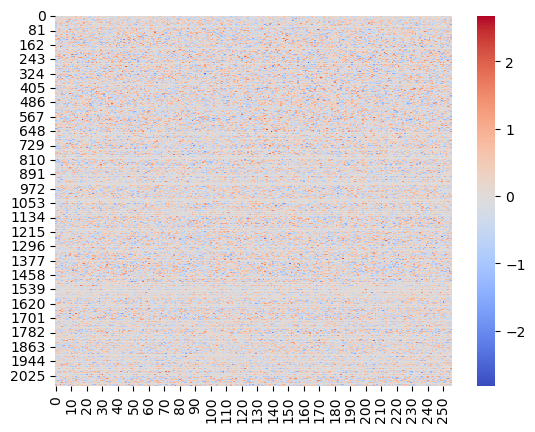

In [ ]:
# Load your RNN model
model = tf.keras.models.load_model('bi_direc_lstm.h5')

# Get the weights of the model's first RNN layer
rnn_layer = model.layers[0]
weights = rnn_layer.get_weights()[0]

# Visualize the weights using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(weights, cmap='coolwarm')
plt.show()

## 8.5.2 Analyzing weight changes

235/235 [==============================] - 2s 7ms/step - loss: 0.6424 - accuracy: 0.8316


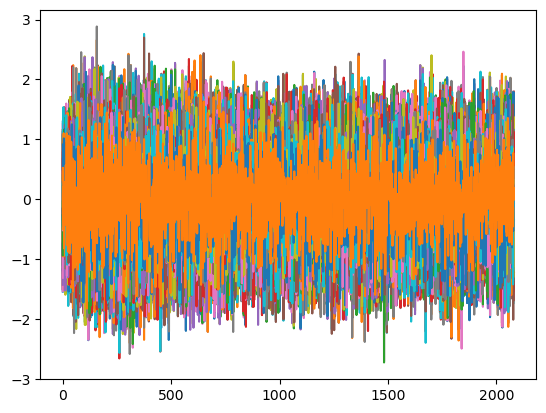

In [ ]:
# Analyze how the weights change over time during training
for i in range(2):
    model.fit(X, Y, epochs=1, batch_size=32)
    weights = rnn_layer.get_weights()[0]
    plt.plot(weights)    
plt.show()

## 8.5.3 Using PCA for dimesionality reduction and then plotting the 2081 words
## Here we are reducing the dimensions from 256 to 2

(2081, 2)


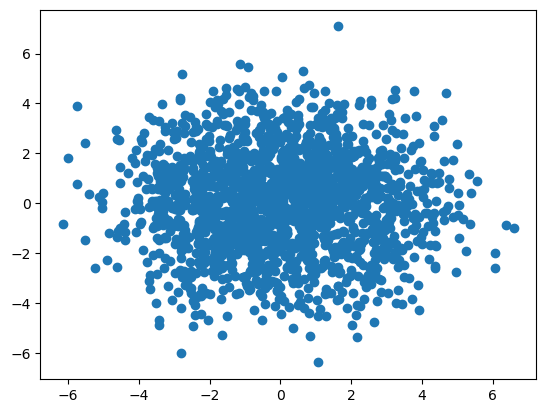

In [ ]:
# Use PCA to identify patterns in the weights
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
weights_pca = pca.fit_transform(weights)
print(weights_pca.shape)
plt.scatter(weights_pca[:,0], weights_pca[:,1])
plt.show()

## tensor-board can be used for better visualiazation of clustering of words